# Predict the Criminal

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
train = pd.read_csv('criminal_train.csv')
test = pd.read_csv('criminal_test.csv')

In [3]:
train.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,...,1,2,1,1,2,2,3884.805998,40026,1,0
1,13005143,4,1,3,1,2,1,1,1,99,...,2,2,2,3,2,2,1627.108106,40015,2,1
2,67415143,4,1,2,1,2,1,1,1,99,...,2,2,2,3,2,2,4344.957980,40024,1,0
3,70925143,4,0,2,1,1,1,1,1,99,...,2,2,1,1,2,2,792.521931,40027,1,0
4,75235143,1,0,6,1,4,1,1,1,99,...,2,2,2,2,2,2,1518.118526,40001,2,0


In [4]:
test.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,66583679,4,0,4,1,2,1,1,1,99,...,2,2,2,1,1,2,2,16346.795400,40020,1
1,35494679,4,0,4,1,1,1,1,1,99,...,3,2,2,1,1,2,2,3008.863906,40044,2
2,79424679,2,0,3,1,2,1,1,1,99,...,1,2,2,2,2,2,2,266.952503,40040,2
3,11744679,4,0,6,1,2,1,1,1,99,...,3,2,2,1,1,2,2,5386.928199,40017,1
4,31554679,1,0,4,1,3,1,1,1,99,...,3,2,1,1,1,2,2,173.489895,40017,1


## Exploratory Data Analysis

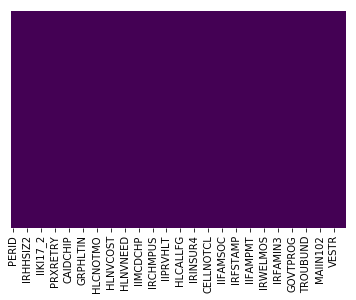

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

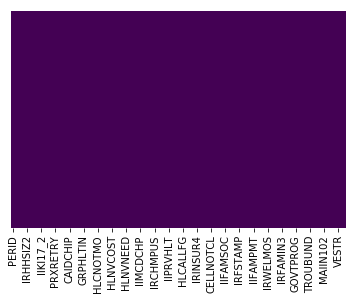

In [6]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

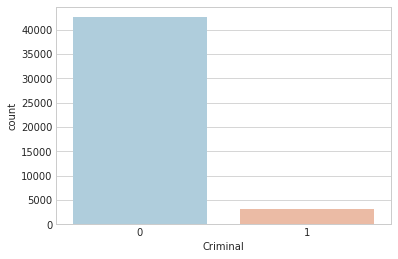

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Criminal',data=train,palette='RdBu_r')

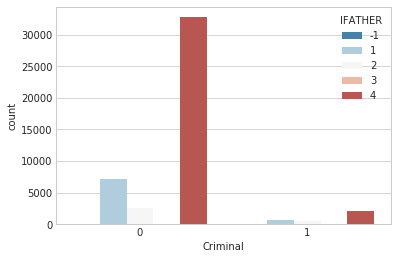

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Criminal',hue='IFATHER',data=train,palette='RdBu_r')

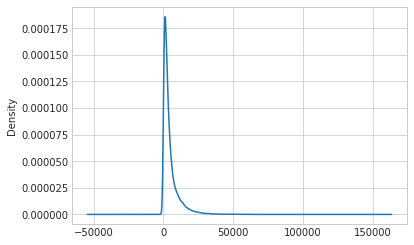

In [9]:
train['ANALWT_C'].plot.kde()

Text(0.5,1,'Train.corr()')

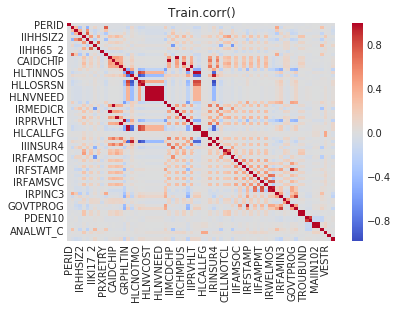

In [11]:
sns.heatmap(train.corr(),cmap='coolwarm')
plt.title('Train.corr()')

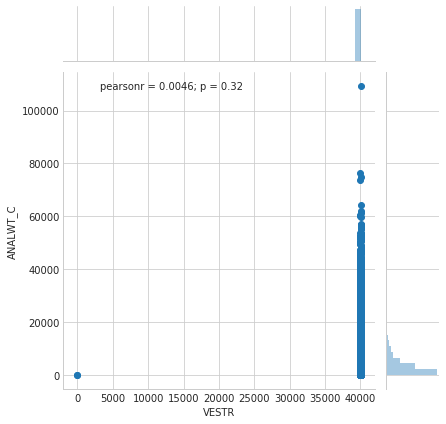

In [14]:
sns.jointplot(x="VESTR", y="ANALWT_C", data=train);

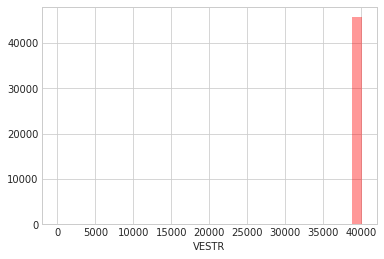

In [12]:
sns.distplot(train['VESTR'],bins=30,kde=False,color='red')

## Data Cleaning

### Drop unnecessary column PERID

In [26]:
train.drop("PERID",axis=1,inplace=True)

In [27]:
train.shape

(45718, 71)

In [28]:
test.shape

(11430, 71)

# Building a Model

## Train-Test Split
Split the data into Training testing set

In [29]:
X_train = train.drop('Criminal', axis=1)
y_train = train['Criminal']
X_test = test.drop('PERID', axis=1)

## Random Forest
### Training and Predicting
We'll start training using Random Forest.

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
RFC_prediction = random_forest.predict(X_test)

In [33]:
random_forest.score(X_train, y_train)

0.99995625355439866

## Result file into .csv

In [43]:
submission = pd.DataFrame({    
    "PERID": test["PERID"],
    "Criminal": RFC_prediction,
    })
submission.to_csv('Result.csv', index=False, columns=['PERID', 'Criminal'])

In [44]:
result = pd.read_csv('Result1.csv')
result.head()

,PERID,Criminal
0,66583679,0
1,35494679,0
2,79424679,0
3,11744679,0
4,31554679,0
